In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

import seaborn as sn
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [2]:
#Unpickling
import pickle
filename='filtered_data'
infile = open(filename,'rb')
final=pickle.load(infile)
infile.close()

In [3]:
test=final[final['Score']=='positive']
test2=final[final['Score']=='negative']
final3=pd.concat([final2.head(2000),final2.tail(2000)])

In [8]:
X_TSNE=final3['CleanedText']
y_TSNE=final3['Score']

In [9]:
def conversion(x):
    if x == 'positive':
        return 1
    return 0
y_TSNE = y_TSNE.map(conversion) 

In [10]:
print X_TSNE.shape
print y_TSNE.shape

(4000,)
(4000,)


In [11]:
import pickle

filename='X_TSNE'
outfile=open(filename,'wb')
pickle.dump(X_TSNE, outfile)
outfile.close()

filename='y_TSNE'
outfile=open(filename,'wb')
pickle.dump(y_TSNE, outfile)
outfile.close()

In [12]:
count_vect = CountVectorizer() #in scikit-learn
X_TSNE_BOW = count_vect.fit_transform(X_TSNE)

filename='X_TSNE_BOW'
outfile=open(filename,'wb')
pickle.dump(X_TSNE_BOW, outfile)
outfile.close()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_TSNE_BOW_standarized_data = scaler.fit_transform(X_TSNE_BOW)

filename='X_TSNE_BOW_standarized_data'
outfile=open(filename,'wb')
pickle.dump(X_TSNE_BOW_standarized_data, outfile)
outfile.close()

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [14]:
from sklearn.decomposition import TruncatedSVD
truncate=TruncatedSVD(n_components=100, random_state=0)

truncate.fit(X_TSNE_BOW_standarized_data)
X_TSNE_BOW_standarized_data_SVD = truncate.transform(X_TSNE_BOW_standarized_data)

outfile=open('X_TSNE_BOW_standarized_data_SVD','wb')
pickle.dump(X_TSNE_BOW_standarized_data_SVD, outfile)
outfile.close()

In [15]:
#TF-IDF
tf_idf_vect = TfidfVectorizer()
X_TSNE_tf_idf = tf_idf_vect.fit_transform(X_TSNE)

filename='X_TSNE_tf_idf'
outfile=open(filename,'wb')
pickle.dump(X_TSNE_tf_idf, outfile)
outfile.close()

/usr/lib/python2.7/dist-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [16]:
scaler =  StandardScaler(with_mean=False)
X_TSNE_tf_idf_standarized_data = scaler.fit_transform(X_TSNE_tf_idf)

filename='X_TSNE_tf_idf_standarized_data'
outfile=open(filename,'wb')
pickle.dump(X_TSNE_tf_idf_standarized_data, outfile)
outfile.close()

In [17]:
truncate=TruncatedSVD(n_components=100, random_state=0)
truncate.fit(X_TSNE_tf_idf_standarized_data)
X_TSNE_tfidf_standarized_data_SVD = truncate.transform(X_TSNE_tf_idf_standarized_data)

outfile=open('X_TSNE_tfidf_standarized_data_SVD','wb')
pickle.dump(X_TSNE_tfidf_standarized_data_SVD, outfile)
outfile.close()


In [18]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim

model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [19]:
#W2V
i=0
list_of_sent=[]
for sent in X_TSNE:
    list_of_sent.append(sent.split())
    
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)    
words = list(w2v_model.wv.vocab)

In [20]:
filename='list_of_sent_TSNE'
outfile=open(filename,'wb')
pickle.dump(list_of_sent, outfile)
outfile.close()

In [21]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [22]:
#Pickling
import pickle
filename='sent_vectors_AvgW2V_TSNE'
outfile=open(filename,'wb')
pickle.dump(sent_vectors, outfile)
outfile.close()

In [23]:
from sklearn.preprocessing import StandardScaler
AvgW2V_TSNE_standarized_data = StandardScaler().fit_transform(sent_vectors)

filename='TSNE_AvgW2V_std'
outfile=open(filename,'wb')
pickle.dump(AvgW2V_TSNE_standarized_data, outfile)
outfile.close()

In [24]:
# TF-IDF weighted Word2Vec
from datetime import datetime
count=0
i=0
start = datetime.now()

tfidf_feat = tf_idf_vect.get_feature_names()# tfidf words/col-names
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent:# for each review/sentence 
    #print sent
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        #print word
        if ((word in words) and (word in tfidf_feat)):
            vec = w2v_model.wv[word]
            #print vec
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf =X_TSNE_tf_idf[row, tfidf_feat.index(word)]
            #print tf_idf
            sent_vec += (vec * tf_idf)
            #print sent_vec
            weight_sum += tf_idf
            #print weight_sum
    if weight_sum != 0:
        sent_vec /= weight_sum
        #print sent_vec
    tfidf_sent_vectors.append(sent_vec)
    row += 1
print (datetime.now()-start)/60

0:00:01.145834


In [25]:
filename='tfidfW2V_sent_vectors_TSNE'
outfile=open(filename,'wb')
pickle.dump(tfidf_sent_vectors, outfile)
outfile.close()

In [26]:
from sklearn.preprocessing import StandardScaler
TFIDF_W2V_TSNE_standarized_data = StandardScaler().fit_transform(tfidf_sent_vectors)

filename='TFIDF_W2V_TSNE_standarized_data'
outfile=open(filename,'wb')
pickle.dump(TFIDF_W2V_TSNE_standarized_data,outfile)

In [28]:
filename='X_TSNE_BOW_standarized_data_SVD'
infile = open(filename,'rb')
X_TSNE_BOW_standarized_data_SVD=pickle.load(infile)
infile.close()

filename='X_TSNE_tfidf_standarized_data_SVD'
infile = open(filename,'rb')
X_TSNE_tfidf_standarized_data_SVD=pickle.load(infile)
infile.close()

filename='TSNE_AvgW2V_std'
infile = open(filename,'rb')
TSNE_AvgW2V_std=pickle.load(infile)
infile.close()

filename='TFIDF_W2V_TSNE_standarized_data'
infile = open(filename,'rb')
TFIDF_W2V_TSNE_standarized_data=pickle.load(infile)
infile.close()

ValueError: insecure string pickle

In [36]:
# TSNE
def plot_tsne(X,Y,perplexity,n_iter):
    from sklearn.manifold import TSNE

    model = TSNE(n_components=2, random_state=0,perplexity=perplexity,n_iter=n_iter)

    tsne_data = model.fit_transform(X)

    # creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, Y)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()

# NOTE: Blue points- Negative Points (labeled as 0) and Orange points-Positive Points(labeled as 1)

# BOW 

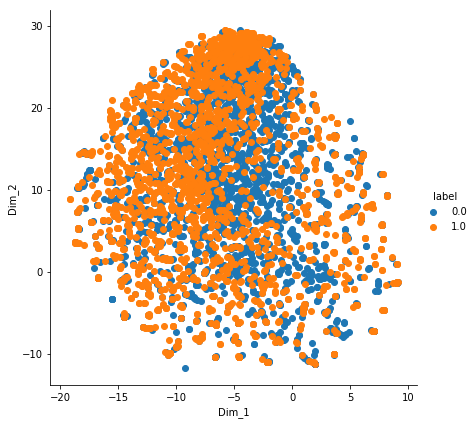

In [37]:
plot_tsne(X_TSNE_BOW_standarized_data_SVD,y_TSNE,30,500)

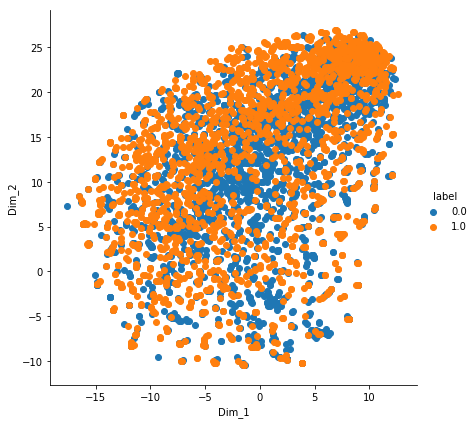

In [38]:
plot_tsne(X_TSNE_BOW_standarized_data_SVD,y_TSNE,40,1000)

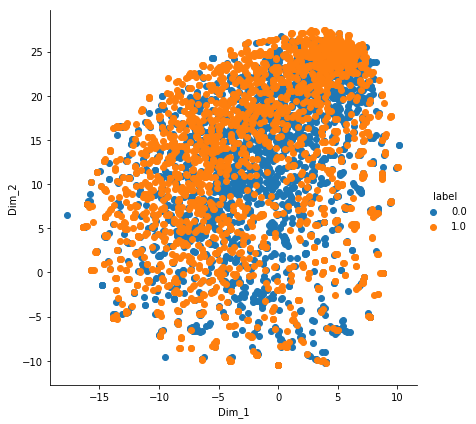

In [39]:
plot_tsne(X_TSNE_BOW_standarized_data_SVD,y_TSNE,50,1000)

It is observed that there was a little change when the perplexity changed from 30 to 40 and no.of iterations maintained at 1000 and there after when perplexity changed to 50,there was not much a change is observed and no clear seperation between them.

# TFIDF

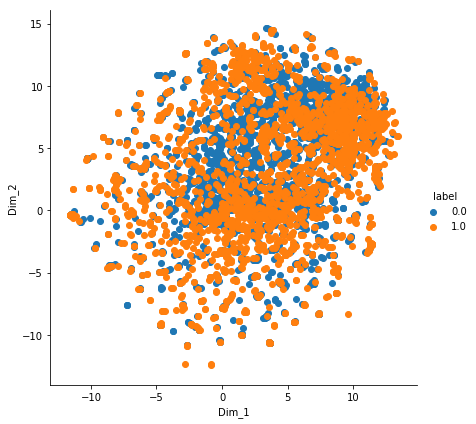

In [40]:
plot_tsne(X_TSNE_tfidf_standarized_data_SVD,y_TSNE,30,500)

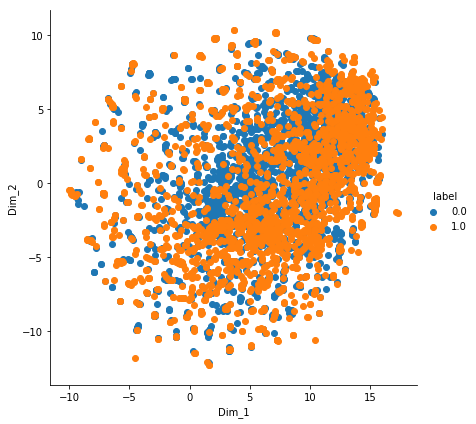

In [41]:
plot_tsne(X_TSNE_tfidf_standarized_data_SVD,y_TSNE,40,500)

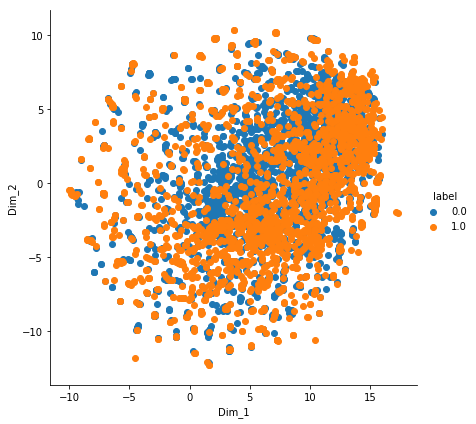

In [42]:
plot_tsne(X_TSNE_tfidf_standarized_data_SVD,y_TSNE,40,1000)

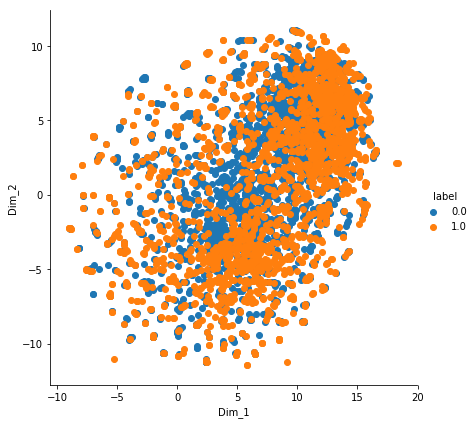

In [43]:
plot_tsne(X_TSNE_tfidf_standarized_data_SVD,y_TSNE,50,1000)

It is observed that there was a change when the perplexity changed from 30 to 40 and 40 to 50 and no.of iterations maintained at 1000 where the points belonging to a category came closer comparing to previous combinations but no clear seperation between them.

# AVGW2V

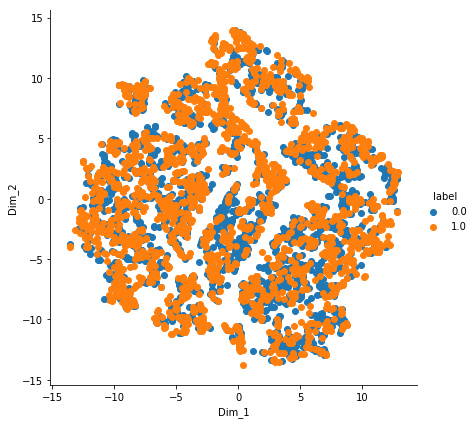

In [44]:
plot_tsne(TSNE_AvgW2V_std,y_TSNE,30,500)

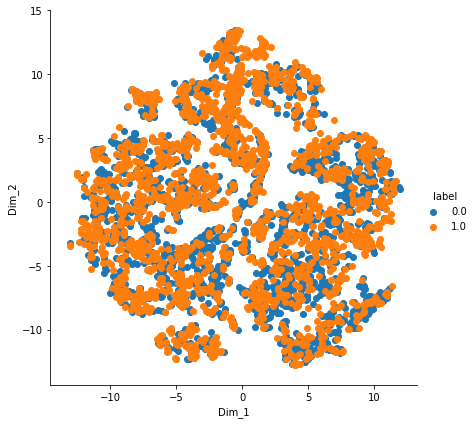

In [45]:
plot_tsne(TSNE_AvgW2V_std,y_TSNE,40,500)

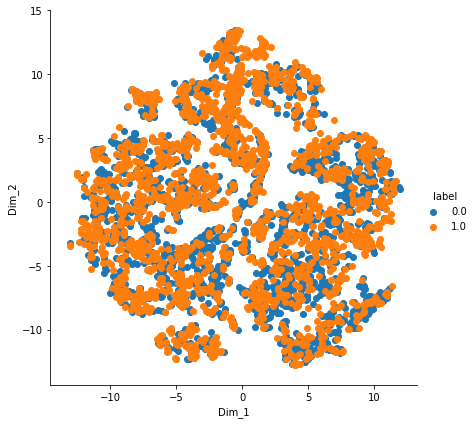

In [46]:
plot_tsne(TSNE_AvgW2V_std,y_TSNE,40,1000)

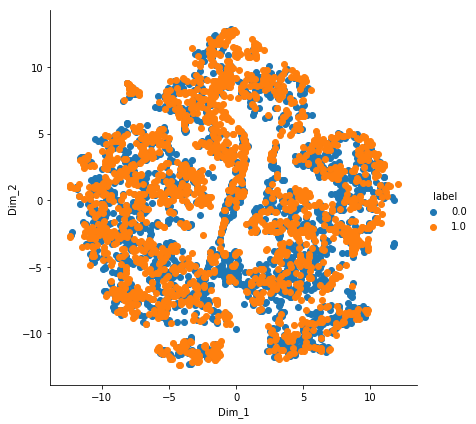

In [47]:
plot_tsne(TSNE_AvgW2V_std,y_TSNE,50,500)

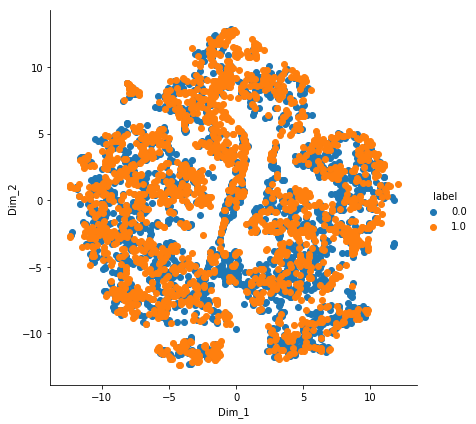

In [48]:
plot_tsne(TSNE_AvgW2V_std,y_TSNE,50,1000)

It is observed that there was no much change when the perplexity changed from 30 to 40 and 40 to 50 and no.of iterations from 500 to 1000 except that the points became a bit denser in very few regions.

# TFIDF AvgW2V

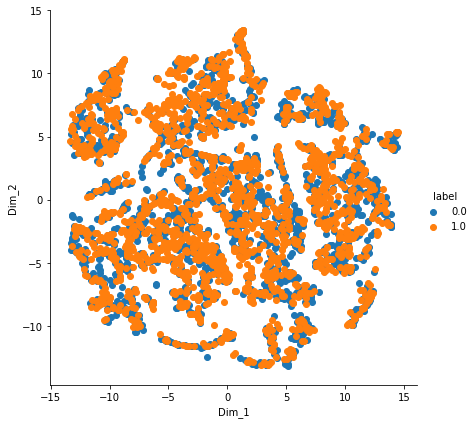

In [49]:
plot_tsne(TFIDF_W2V_TSNE_standarized_data,y_TSNE,30,500)

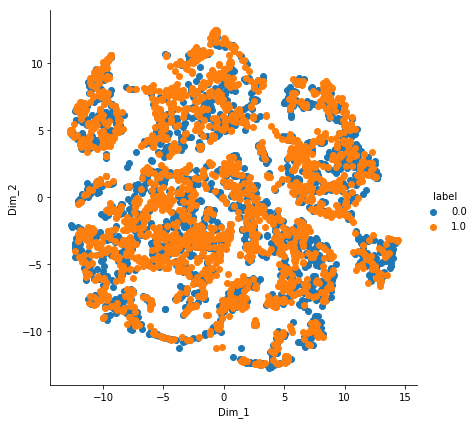

In [50]:
plot_tsne(TFIDF_W2V_TSNE_standarized_data,y_TSNE,40,500)

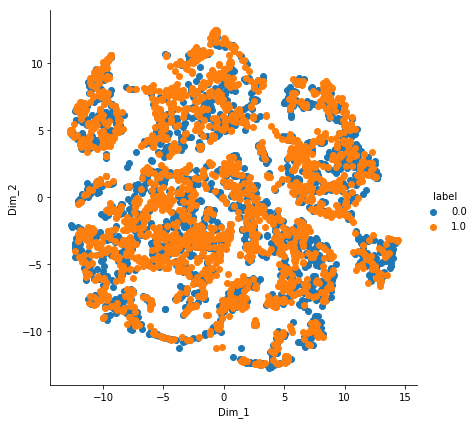

In [51]:
plot_tsne(TFIDF_W2V_TSNE_standarized_data,y_TSNE,40,1000)

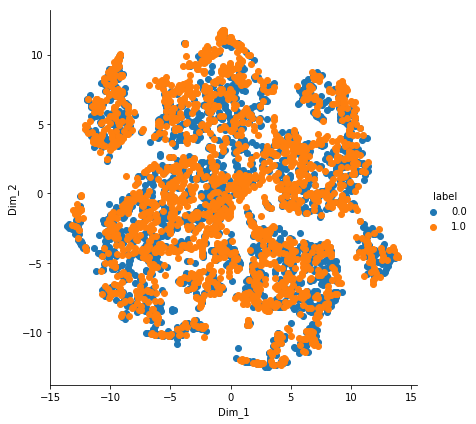

In [52]:
plot_tsne(TFIDF_W2V_TSNE_standarized_data,y_TSNE,50,500)

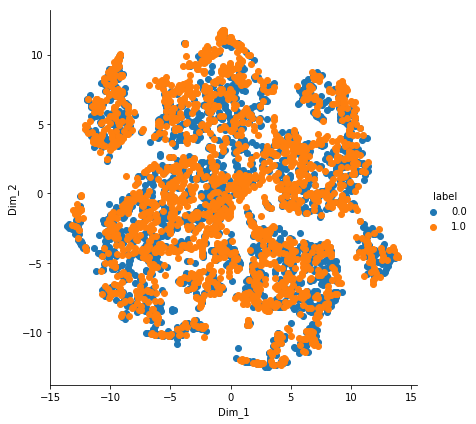

In [53]:
plot_tsne(TFIDF_W2V_TSNE_standarized_data,y_TSNE,50,1000)

It is observed that there was a little change when the perplexity changed from 30 to 40 and 40 to 50 and no.of iterations from 500 to 1000 where the points became a bit denser in few regions.